## Lab | Random variable distributions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import linear_model                  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import norm, expon

In [2]:
numerical=pd.read_csv('numerical.csv')

In [3]:
numerical.head()

,Unnamed: 0,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [29]:
numerical = numerical.drop(["Unnamed: 0", "effective_to_date"], axis=1)

In [30]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

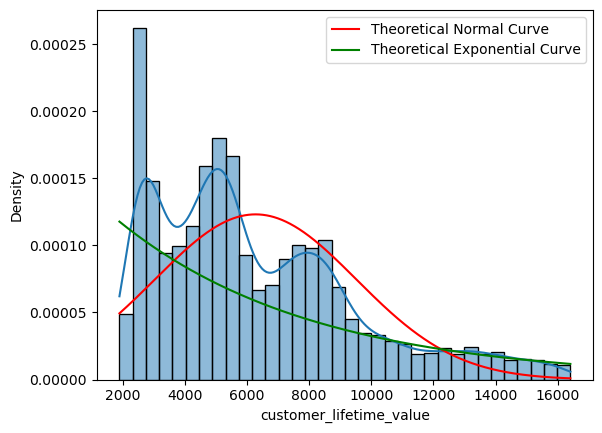

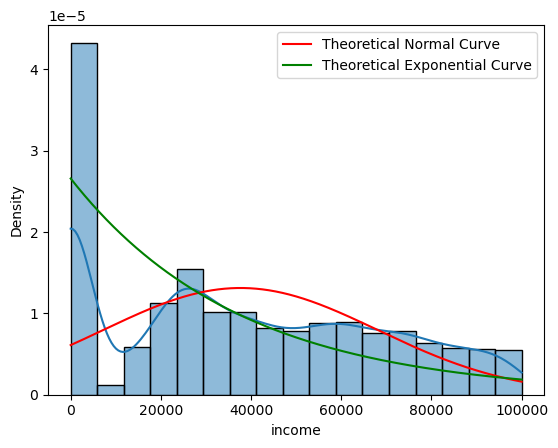

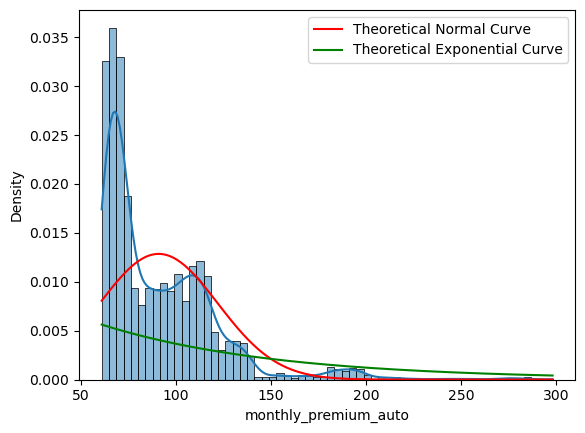

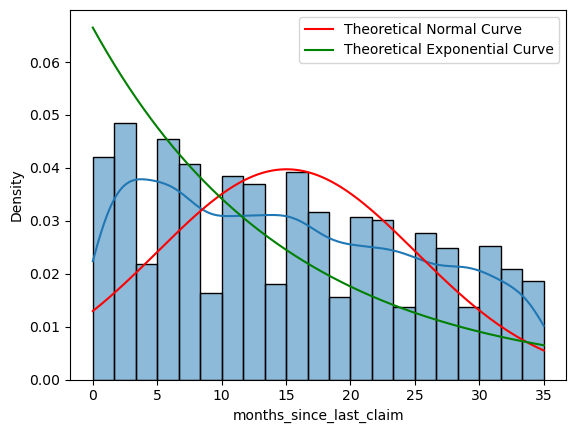

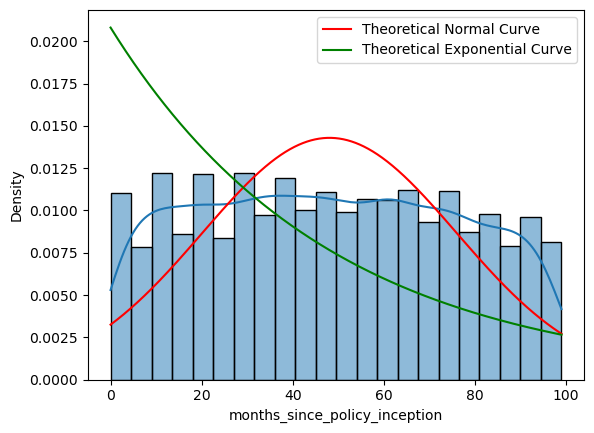

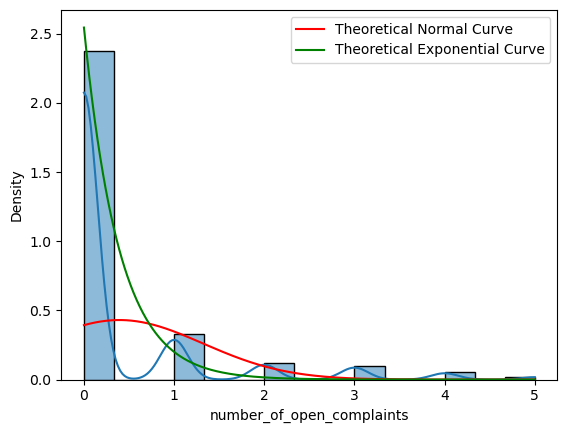

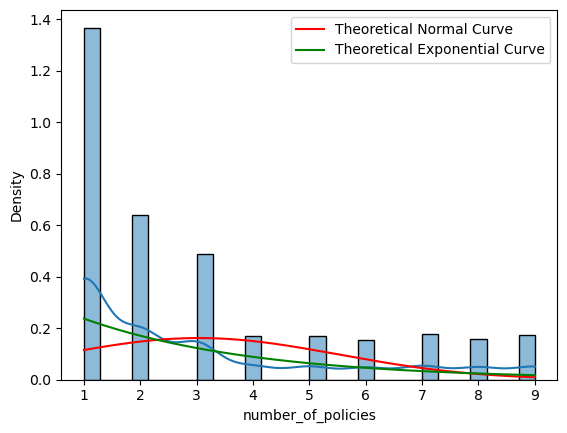

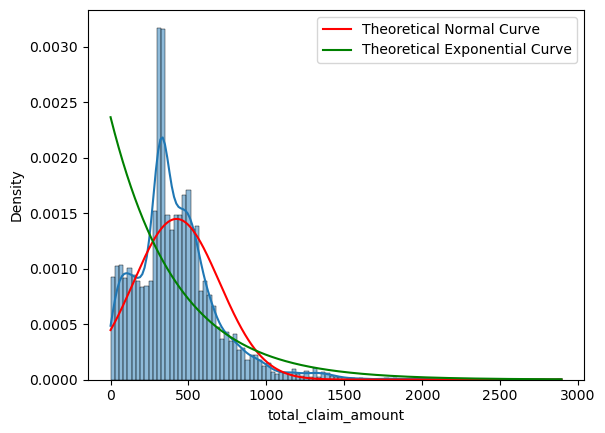

In [31]:
for col in numerical.columns:
    sns.histplot(numerical[col], kde=True, stat='density')

    x = np.linspace(numerical[col].min(), numerical[col].max(), 1000)
    normal_curve = norm.pdf(x, loc=numerical[col].mean(), scale=numerical[col].std())
    plt.plot(x, normal_curve, color='red', label='Theoretical Normal Curve')

    exponential_curve = expon.pdf(x, scale=numerical[col].mean())  
    plt.plot(x, exponential_curve, color='green', label='Theoretical Exponential Curve')

    plt.legend()
    plt.show()

Conclusions:

Those plots matches more theoretical normal distribution:
- customer_lifetime_value
- months_since_last_claim
- months_since_policy_inception
- total_claim_amount

Those plots matches more theoretical exponential distribution:
- income
- monthly_premium_auto
- number_of_open_complaints
- number_of_policies

#### 3. log Transformaton

In [32]:
numerical_log_transformed = np.log1p(numerical)

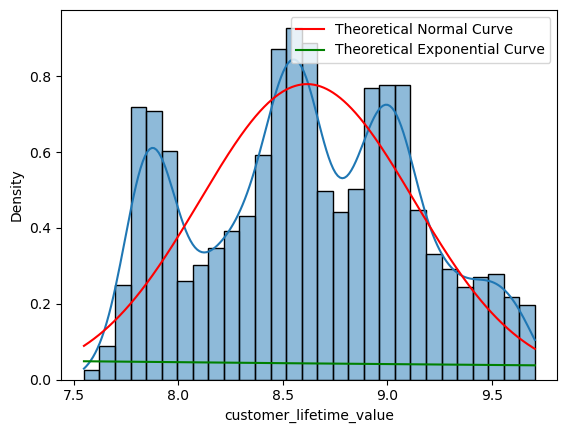

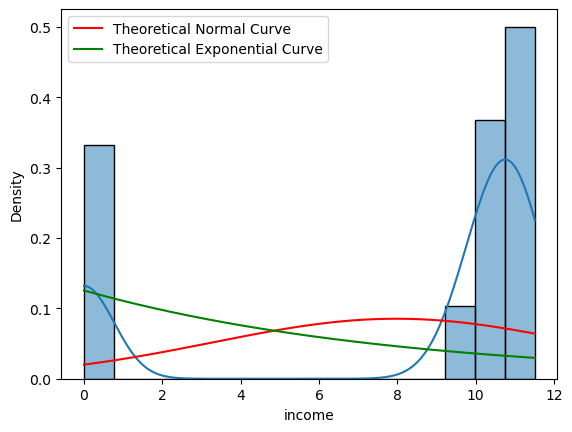

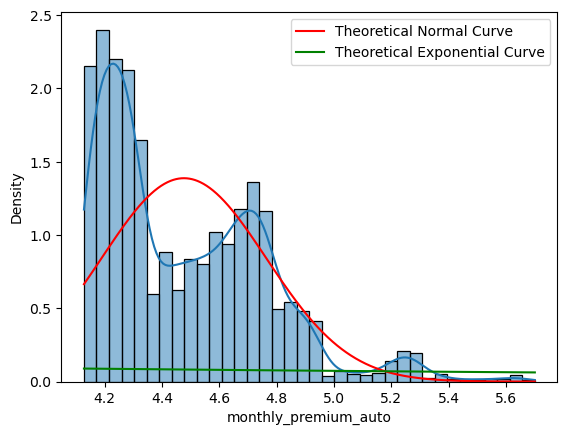

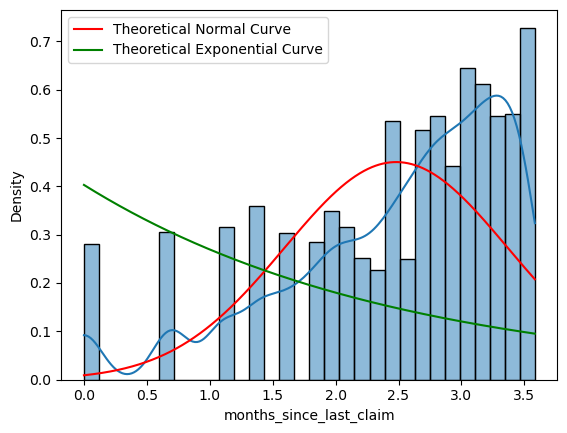

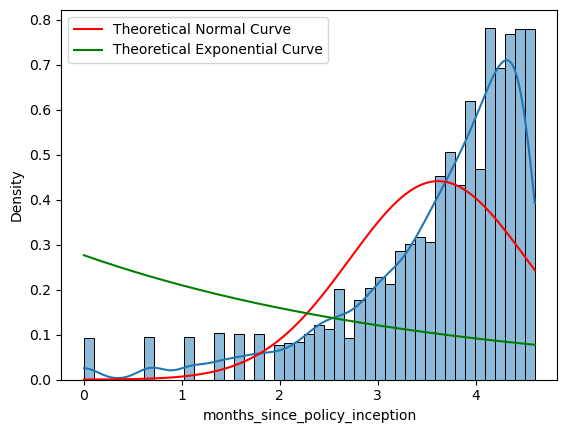

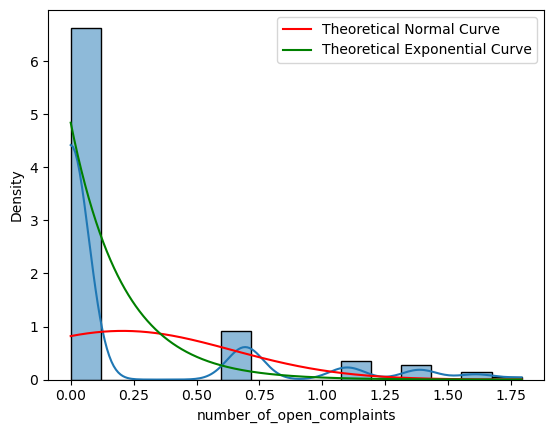

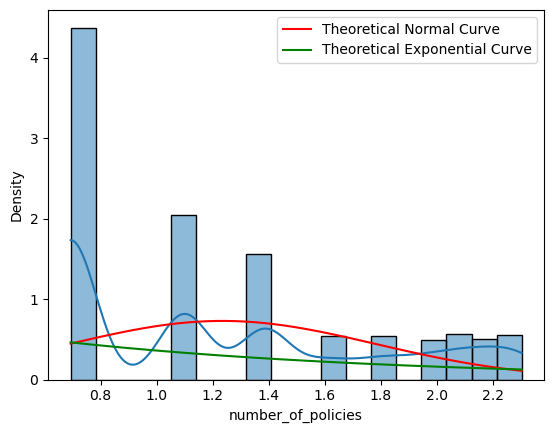

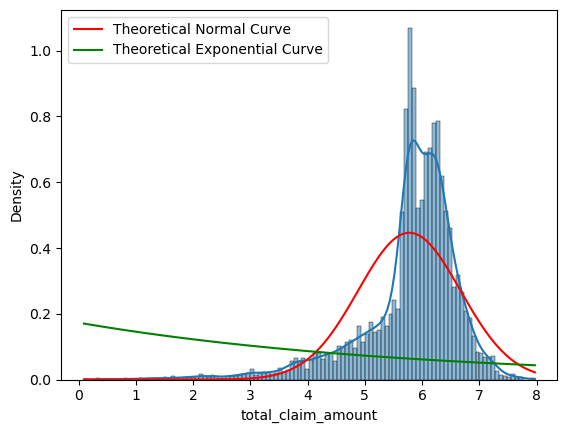

In [33]:
for col in numerical.columns:
    sns.histplot(numerical_log_transformed[col], kde=True, stat='density')

    x = np.linspace(numerical_log_transformed[col].min(), numerical_log_transformed[col].max(), 1000)
    normal_curve = norm.pdf(x, loc=numerical_log_transformed[col].mean(), scale=numerical_log_transformed[col].std())
    plt.plot(x, normal_curve, color='red', label='Theoretical Normal Curve')

    exponential_curve = expon.pdf(x, scale=numerical_log_transformed[col].mean())  
    plt.plot(x, exponential_curve, color='green', label='Theoretical Exponential Curve')

    plt.legend()
    plt.show()

Conclusion:
- Conclusion: log transformation does change the shape of the distribution! 
- also log transformation also changes the mean value. 
- log transformation is not for analysing data.
- Still the shape of data matches the same kind of distribution.